In [68]:
from compas_vol.primitives import VolSphere, VolBox
from compas_vol.combinations import Union
from compas_vol.analysis import Gradient
from compas.geometry import Box, Frame, Point, Sphere

In [37]:
import numpy as np
#import meshplot as mp
#from skimage.measure import marching_cubes
#from compas_vol.utilities import bbox_edges
import matplotlib.pyplot as plt
import random

In [32]:
s = Sphere(Point(5, 6, 0), 12)
b = Box(Frame([0,0,1],[1,0,0],[0,1,0]), 25, 20, 15)
vs = VolSphere(s)
vb = VolBox(b, 2.5)
u = Union(vs, vb)

In [56]:
spheres = []
for i in range(10):
    cx = random.random()*40-20
    cy = random.random()*40-20
    s = Sphere([cx,cy,0], 5+random.random()*5)
    spheres.append(VolSphere(s))
u = Union(spheres)

In [57]:
#workspace initialization
# lower and upper bounds
lbx, ubx = -30.0, 30.0
lby, uby = -30.0, 30.0
lbz, ubz = -30.0, 30.0
# resolution(s)
nx, ny, nz = 50, 50, 50
x, y, z = np.ogrid[lbx:ubx:nx*1j, lby:uby:ny*1j, lbz:ubz:nz*1j]
#voxel dimensions
gx = (ubx-lbx)/nx
gy = (uby-lby)/ny
gz = (ubz-lbz)/nz

In [69]:
g = Gradient(u)

In [72]:
gv = g.get_gradient_numpy(x,y,z)
dm = u.get_distance_numpy(x,y,z)

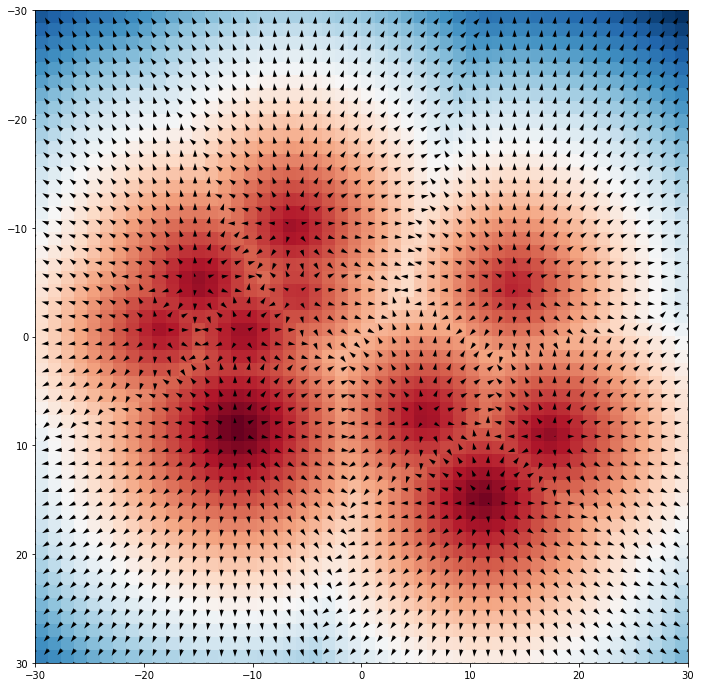

In [82]:
slice = gv[:,:,25]
plt.figure(figsize=(12,12))
plt.imshow(dm[:,:,25], cmap='RdBu', extent=[lbx,ubx,uby,lby])
plt.quiver(x, y, slice[:,:,1], -slice[:,:,0])